In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import file
df = pd.read_csv(r"C:\Users\boden\Downloads\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# 1a. Which game had the most sales in japan?
most_sales_jp = df[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False)
most_sales_jp.head()

,Name,JP_Sales
4,Pokemon Red/Pokemon Blue,10.22
12,Pokemon Gold/Pokemon Silver,7.20
1,Super Mario Bros.,6.81
6,New Super Mario Bros.,6.50
20,Pokemon Diamond/Pokemon Pearl,6.04


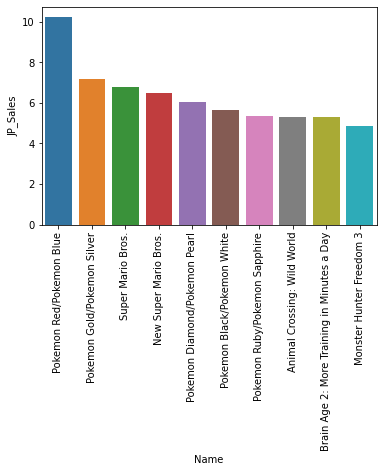

In [5]:
# 1b. Which game had the most sales in japan?
sns.barplot(x='Name', y='JP_Sales', data=most_sales_jp[0:10])
plt.xticks(rotation=90)
plt.show()

The most sold game in Japan is Pokemon Red/Pokemon Blue followed by Pokemon Gold/Pokemon Silver	& Super Mario Bros.	

In [6]:
# 2a. Which Pokemon game was the most successful in terms of global sales?
pokemon = df[df['Name'].str.contains('Pokemon')]
pokemon_most_sales = pokemon[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False)
pokemon_most_sales.head()

,Name,Global_Sales
4,Pokemon Red/Pokemon Blue,31.37
12,Pokemon Gold/Pokemon Silver,23.10
20,Pokemon Diamond/Pokemon Pearl,18.36
25,Pokemon Ruby/Pokemon Sapphire,15.85
26,Pokemon Black/Pokemon White,15.32


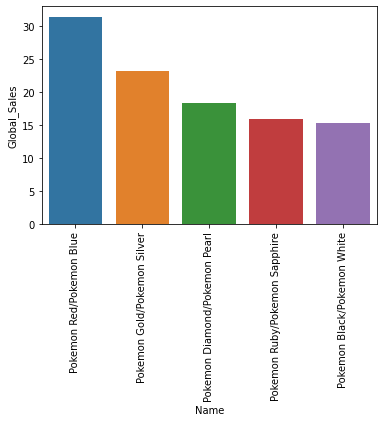

In [7]:
# 2b. Which Pokemon game was the most successful in terms of global sales?
sns.barplot(x='Name', y='Global_Sales', data=pokemon_most_sales[0:5])
plt.xticks(rotation=90)
plt.show()

The most sold Pokemon game worldwide is Pokemon Red/Pokemon Blue followed by Pokemon Gold/Pokemon Silver & Pokemon Diamond/Pokemon Pearl.

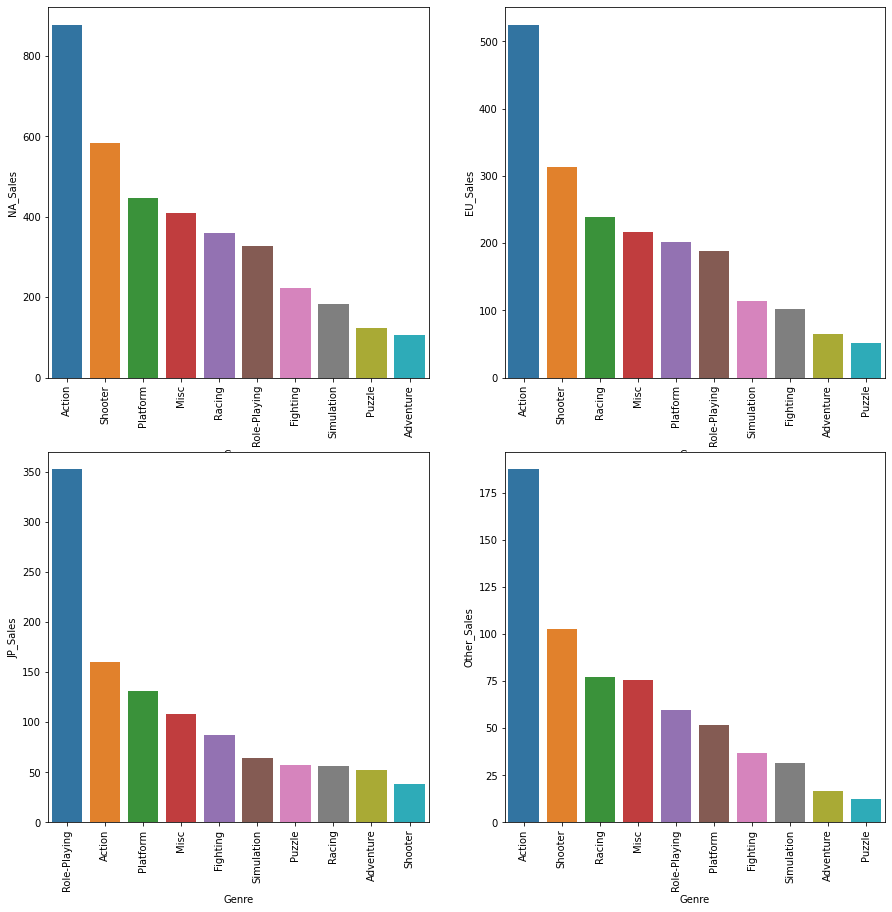

In [8]:
# 3. Create 4 charts next to and below each other that show the sales per genre per market (each market an own diagram).
df_sales = df.groupby('Genre', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.barplot(data=df_sales[0:10].sort_values(by='NA_Sales', ascending=False), x='Genre', y='NA_Sales', ax=ax[0,0])
sns.barplot(data=df_sales[0:10].sort_values(by='EU_Sales', ascending=False), x='Genre', y='EU_Sales', ax=ax[0,1])
sns.barplot(data=df_sales[0:10].sort_values(by='JP_Sales', ascending=False), x='Genre', y='JP_Sales', ax=ax[1,0])
sns.barplot(data=df_sales[0:10].sort_values(by='Other_Sales', ascending=False), x='Genre', y='Other_Sales', ax=ax[1,1])

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)


plt.show()



In all markets, Action games generate the most revenue besides from Japan where Role-Playing generates the most.

In [16]:
#4a. Which game in which market had the highest percentage from global sales? All markest should have the game at least sold once.
df['NA_Percent'] = df['NA_Sales'] /df['Global_Sales']
df['EU_Percent'] = df['EU_Sales'] /df['Global_Sales']
df['JP_Percent'] = df['JP_Sales'] /df['Global_Sales']
df['Other_Percent'] = df['Other_Sales'] /df['Global_Sales']
market_percent = df[(df.NA_Percent != 0) & (df.EU_Percent != 0) & (df.JP_Percent != 0) & (df.Other_Percent != 0)]
market_percent.sort_values(by='NA_Percent', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Percent,EU_Percent,JP_Percent,Other_Percent
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.951254,0.022254,0.009890,0.016602
238,239,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,0.922737,0.057395,0.002208,0.017660
1461,1463,Need for Speed Carbon,PS2,2006.0,Racing,Electronic Arts,1.22,0.05,0.05,0.01,1.34,0.910448,0.037313,0.037313,0.007463
1213,1215,Tom Clancy's Ghost Recon Advanced Warfighter,X360,2006.0,Shooter,Ubisoft,1.40,0.02,0.02,0.10,1.54,0.909091,0.012987,0.012987,0.064935
1944,1946,Call of Duty 4: Modern Warfare,DS,2007.0,Shooter,Activision,0.96,0.02,0.01,0.08,1.06,0.905660,0.018868,0.009434,0.075472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,1579,Brian Lara Cricket,PS,1998.0,Sports,Codemasters,0.02,1.13,0.01,0.10,1.26,0.015873,0.896825,0.007937,0.079365
2965,2967,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,2015.0,Misc,Nintendo,0.01,0.61,0.02,0.04,0.69,0.014493,0.884058,0.028986,0.057971
2411,2413,Winning Eleven: Pro Evolution Soccer 2007,PSP,2006.0,Sports,Konami Digital Entertainment,0.01,0.72,0.12,0.01,0.86,0.011628,0.837209,0.139535,0.011628
2196,2198,Colin McRae Rally 04,PS2,2003.0,Racing,Codemasters,0.01,0.71,0.01,0.21,0.94,0.010638,0.755319,0.010638,0.223404


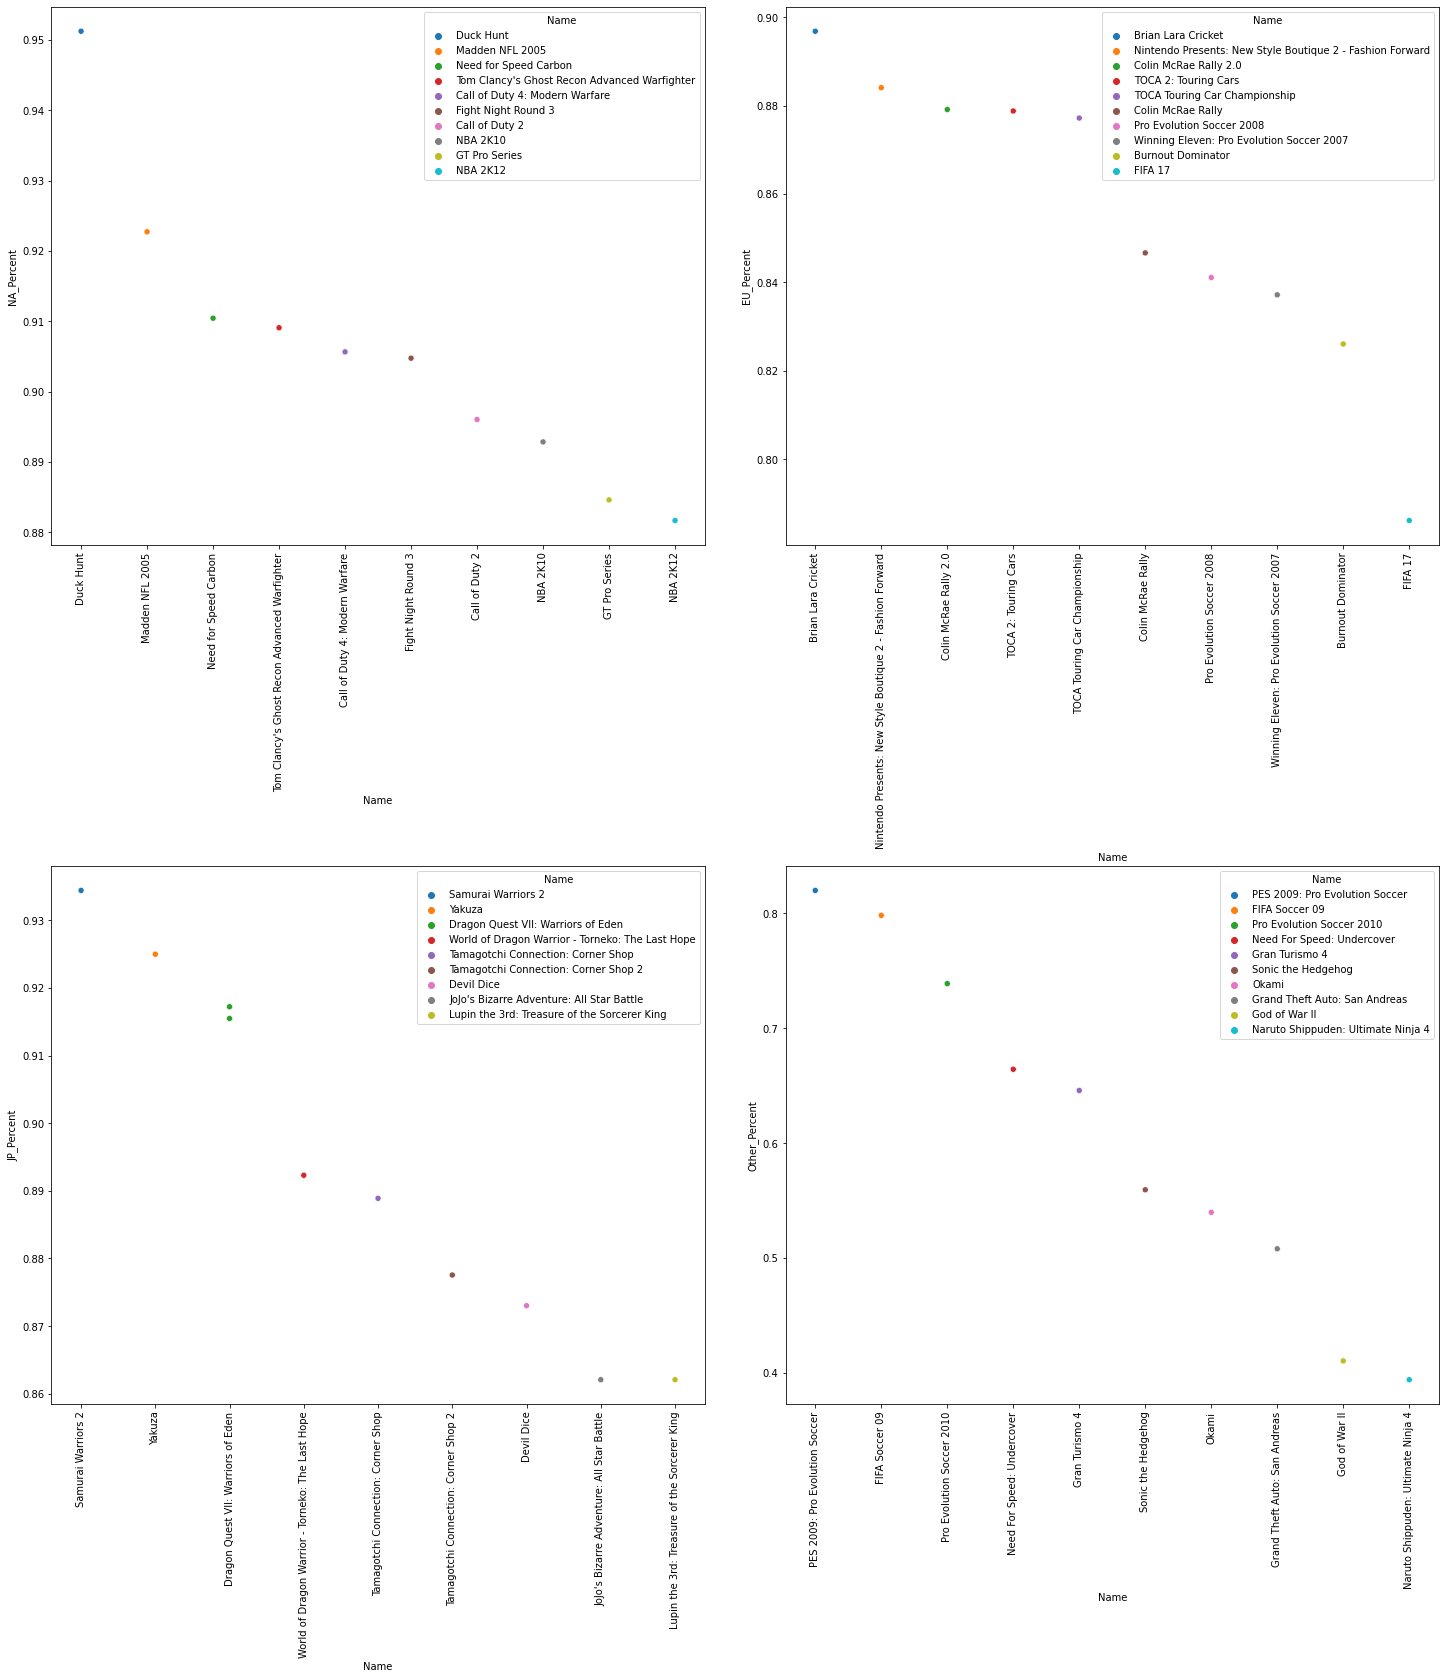

In [17]:
#4b. Which game in which market had the highest percentage from global sales?
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(20)
fig.tight_layout(w_pad=5, h_pad=30)

sns.scatterplot(data=market_percent.sort_values(by='NA_Percent', ascending=False).head(10), x='Name', y='NA_Percent', hue='Name', ax=ax[0,0])
sns.scatterplot(data=market_percent.sort_values(by='EU_Percent', ascending=False).head(10), x='Name', y='EU_Percent', hue='Name', ax=ax[0,1])
sns.scatterplot(data=market_percent.sort_values(by='JP_Percent', ascending=False).head(10), x='Name', y='JP_Percent', hue='Name', ax=ax[1,0])
sns.scatterplot(data=market_percent.sort_values(by='Other_Percent', ascending=False).head(10), x='Name', y='Other_Percent', hue='Name', ax=ax[1,1])

ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

plt.show()



Duck Hunt in North America has the highest percentage with 95%.

<function matplotlib.pyplot.show(close=None, block=None)>

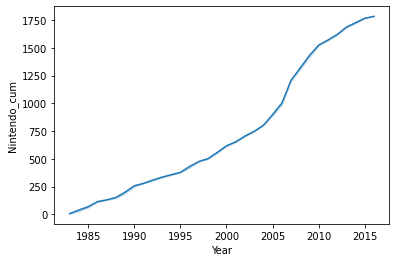

In [22]:
#5. Create a line chart of Nintendo's commulated numbers over the years.
nintendo_sales = df[df['Publisher'] == 'Nintendo'].sort_values(by='Year')
nintendo_sales['Nintendo_cum'] = nintendo_sales['Global_Sales'].cumsum()
sns.lineplot(x='Year', y='Nintendo_cum', data=nintendo_sales)
plt.show

In [27]:
#6a. Compare the percentage increase from year to year of the genres Action, Sports & Shooter? Which has the most growth in % from 2013 - 2015 years?
find_genres = ['Action', 'Sports', 'Shooter']
df_genres = df[df['Genre'].isin(find_genres)]

find_years = [2012, 2013, 2014, 2015]
df_genres = df_genres[df_genres['Year'].isin(find_years)]

df_genres_short = df_genres[['Year', 'Genre', 'Global_Sales']]
df_genres_grouped = df_genres_short.groupby(['Year', 'Genre'], as_index=False)['Global_Sales'].sum().sort_values(by=['Genre', 'Year'])
df_genres_grouped['Change'] = df_genres_grouped.groupby('Genre')['Global_Sales'].pct_change()
df_genres_grouped


,Year,Genre,Global_Sales,Change
0,2012.0,Action,122.04,NaN
3,2013.0,Action,125.22,0.026057
6,2014.0,Action,99.02,-0.209232
9,2015.0,Action,70.70,-0.286003
1,2012.0,Shooter,72.86,NaN
4,2013.0,Shooter,62.80,-0.138073
7,2014.0,Shooter,66.00,0.050955
10,2015.0,Shooter,66.15,0.002273
2,2012.0,Sports,30.93,NaN
5,2013.0,Sports,41.55,0.343356


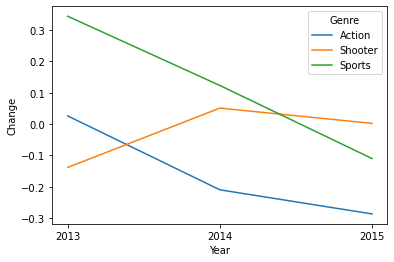

In [28]:
#6b. Compare the percentage increase from year to year of the genres Action, Sports & Shooter? Which has the most growth in % over the last 3 years?
sns.lineplot(x='Year', y='Change', data=df_genres_grouped, hue='Genre')
plt.xticks([2013, 2014, 2015])
plt.show()

Action and Sports declined all years. The only increase has Shooters from 2013 - 2014.

In [35]:
#7a. Create a stacked bar chart for Nintendo, Electronic Arts & Activision for the sales 2000 - 2006 for the market Europe.
publisher_list = ['Nintendo', 'Electronic Arts', 'Activision']

publisher_df = df[df['Publisher'].isin(publisher_list)]
publisher_years = publisher_df[publisher_df['Year'].between(2000, 2006)]

publisher_sorted = publisher_years[['Publisher', 'Year', 'Global_Sales']].sort_values(by=['Publisher', 'Year'])
publisher_sorted['Sales'] = publisher_sorted.groupby(['Year', 'Publisher'], as_index=False)['Global_Sales'].cumsum()
publisher_grouped = publisher_sorted.groupby(['Year', 'Publisher'], as_index=False)['Sales'].sum()
publisher_pivot = publisher_grouped.pivot(index='Year', columns='Publisher', values='Sales')
publisher_pivot


Publisher,Activision,Electronic Arts,Nintendo
Year,,,
2000.0,155.29,561.53,598.89
2001.0,331.60,1489.31,779.03
2002.0,1049.88,5241.75,887.81
2003.0,605.34,4806.77,778.28
2004.0,1458.21,4590.35,2895.82
2005.0,1880.61,6112.59,5148.97
2006.0,724.13,4758.57,10202.26


<AxesSubplot:xlabel='Year'>

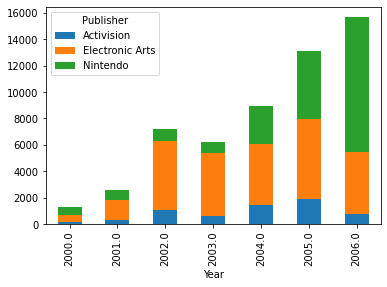

In [32]:
#7b. Create a stacked bar chart for Nintendo, Electronic Arts & Activision for the sales 2000 - 2006 for the market Europe.
publisher_pivot.plot.bar(stacked=True)

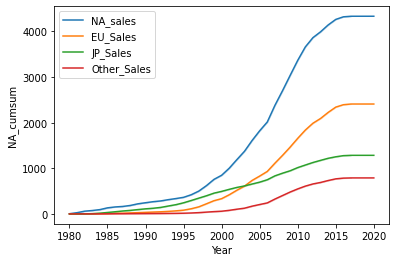

In [ ]:
#8. Create a line chart of the commulated numbers of all markets sales over the years.
market_filter = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sort_values(by='Year')
market_filter['NA_cumsum'] = market_filter['NA_Sales'].cumsum()
market_filter['EU_cumsum'] = market_filter['EU_Sales'].cumsum()
market_filter['JP_cumsum'] = market_filter['JP_Sales'].cumsum()
market_filter['Other_cumsum'] = market_filter['Other_Sales'].cumsum()

sns.lineplot(x='Year', y='NA_cumsum', data=market_filter, label='NA_sales')
sns.lineplot(x='Year', y='EU_cumsum', data=market_filter, label='EU_Sales')
sns.lineplot(x='Year', y='JP_cumsum', data=market_filter, label='JP_Sales')
sns.lineplot(x='Year', y='Other_cumsum', data=market_filter, label='Other_Sales')

plt.show()


North America is the biggest market followed by Europe, Japan & Others.